In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the file
file_path = "DataForSCPEOrig.txt"  # Change this to the actual file path

data = np.loadtxt(file_path, delimiter=",", skiprows=3)  # Skip the header lines

# Extract columns
voltage = data[:, 0]  # Voltage (V)
current = data[:, 1]  # Current (A)

In [9]:
# Compute Power
power = voltage * current

# Short-Circuit Current (Isc) -> Current at V=0
Isc_index = np.argmin(np.abs(voltage))  # Closest to zero voltage
Isc = abs(current[Isc_index])  # Ensure positive value

# Open-Circuit Voltage (Voc) -> Voltage at I=0
Voc_index = np.argmin(np.abs(current))  # Closest to zero current
Voc = abs(voltage[Voc_index])  # Ensure positive value

# Maximum Power Point (MPP)
Pmax_index = np.argmax(power)  # Index where power is max
Vmp = voltage[Pmax_index]
Imp = current[Pmax_index]
Pmax = abs(power[Pmax_index])  # Ensure positive value

# Fill Factor (FF)
FF = abs((Vmp * Imp) / (Voc * Isc))  # Ensure FF is positive

# Series Resistance (Rs) - Slope near Voc
Rs = abs(1 / np.gradient(current, voltage)[Voc_index])  # Ensure positive value

# Shunt Resistance (Rsh) - Slope near Isc
Rsh = abs(1 / np.gradient(voltage, current)[Isc_index])  # Ensure positive value

# Efficiency (Eta)
incident_power = 5e-3  # 5mW
eta = (Pmax / incident_power) * 100  # Convert to percentage


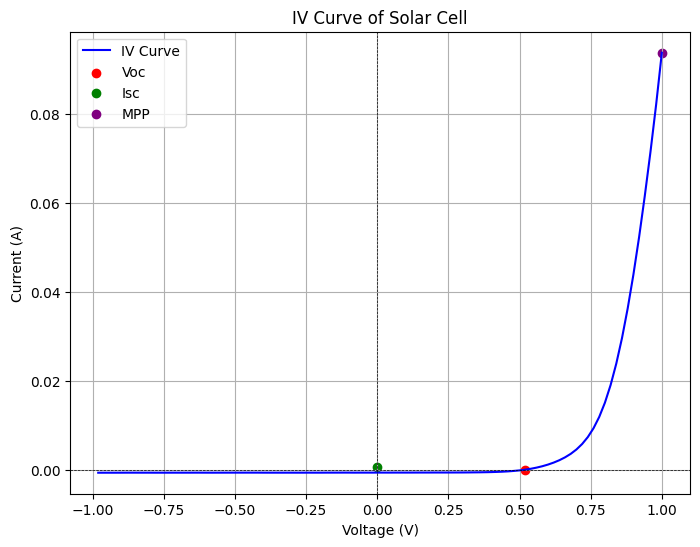

In [10]:
# Plot IV Curve
plt.figure(figsize=(8, 6))
plt.plot(voltage, current, label='IV Curve', color='blue')
plt.scatter([Voc], [0], color='red', label='Voc')
plt.scatter([0], [Isc], color='green', label='Isc')
plt.scatter([Vmp], [Imp], color='purple', label='MPP')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('IV Curve of Solar Cell')
plt.legend()
plt.grid()
plt.show()

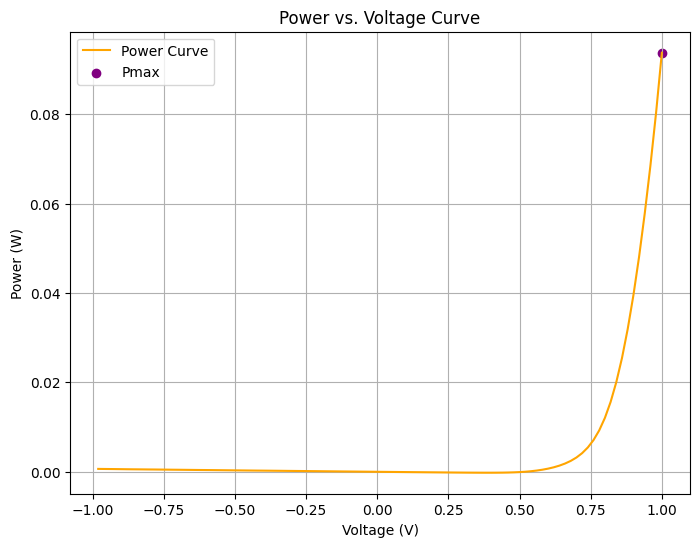

In [11]:
# Plot Power Curve
plt.figure(figsize=(8, 6))
plt.plot(voltage, power, label='Power Curve', color='orange')
plt.scatter([Vmp], [Pmax], color='purple', label='Pmax')
plt.xlabel('Voltage (V)')
plt.ylabel('Power (W)')
plt.title('Power vs. Voltage Curve')
plt.legend()
plt.grid()
plt.show()


In [12]:
# Print Results
print(f"Short-Circuit Current (Isc): {Isc:.6f} A")
print(f"Open-Circuit Voltage (Voc): {Voc:.3f} V")
print(f"Max Power Point (Pmax): {Pmax:.6f} W at Vmp = {Vmp:.3f} V, Imp = {Imp:.6f} A")
print(f"Fill Factor (FF): {FF:.3f}")
print(f"Series Resistance (Rs): {Rs:.3f} Ω")
print(f"Shunt Resistance (Rsh): {Rsh:.3f} Ω")
print(f"Power Conversion Efficiency (Eta): {eta:.3f} %")

Short-Circuit Current (Isc): 0.000632 A
Open-Circuit Voltage (Voc): 0.520 V
Max Power Point (Pmax): 0.093730 W at Vmp = 1.000 V, Imp = 0.093730 A
Fill Factor (FF): 285.206
Series Resistance (Rs): 108.401 Ω
Shunt Resistance (Rsh): nan Ω
Power Conversion Efficiency (Eta): 1874.600 %


In [ ]:
i